In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('../data/processed/df_listo_para_segmentar.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,Anio,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Norte a Sur Origen,Norte a Sur Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,0,Camiña,...,2019,1,enero,109,1,Alta,1061.580205,1061.580205,2,2
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,1,Colchane - P.N. Volcán Isluga,...,2019,1,enero,298,1,Alta,1061.580205,1061.580205,2,2
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,2,Resto región Tarapacá,...,2019,1,enero,2594,1,Alta,1061.580205,1061.580205,2,2
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,3,Pica,...,2019,1,enero,4138,1,Alta,1061.580205,1061.580205,2,2
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,4,Antofagasta,...,2019,1,enero,2071,1,Alta,1061.580205,3724.530431,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,87,Valle del Itata,...,2023,12,diciembre,17,1,Alta,833.567298,833.567298,10,10
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,83,Resto región Ñuble,...,2023,12,diciembre,44,1,Alta,833.567298,833.567298,10,10
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,83,Resto región Ñuble,...,2023,12,diciembre,108,1,Alta,833.567298,833.567298,10,10
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,83,Resto región Ñuble,...,2023,12,diciembre,47,1,Alta,833.567298,833.567298,10,10


In [25]:
st_comuna_destino = df[['CUT Comuna Destino','Anio','CUT Mes','Viajes Ocasionales', 'PIB Region Destino']]
st_comuna_destino = st_comuna_destino[st_comuna_destino['CUT Comuna Destino']==13101]
st_comuna_destino = st_comuna_destino.sort_values(by=['Anio','CUT Mes'])
st_comuna_destino


,CUT Comuna Destino,Anio,CUT Mes,Viajes Ocasionales,PIB Region Destino
165,13101,2019,1,1637,19454.387194
1483,13101,2019,1,277,19454.387194
2272,13101,2019,1,30,19454.387194
2727,13101,2019,1,9,19454.387194
2883,13101,2019,1,28,19454.387194
...,...,...,...,...,...
1565432,13101,2024,6,6,21484.966717
1566633,13101,2024,6,193,21484.966717
1567441,13101,2024,6,45,21484.966717
1568081,13101,2024,6,18,21484.966717


In [26]:
df_agrupado = st_comuna_destino.groupby(['CUT Comuna Destino', 'Anio', 'CUT Mes','PIB Region Destino'], as_index=False)['Viajes Ocasionales'].sum()
df_agrupado

,CUT Comuna Destino,Anio,CUT Mes,PIB Region Destino,Viajes Ocasionales
0,13101,2019,1,19454.387194,71456
1,13101,2019,2,19454.387194,58086
2,13101,2019,3,19454.387194,61188
3,13101,2019,4,20336.524262,35853
4,13101,2019,5,20336.524262,53024
...,...,...,...,...,...
61,13101,2024,2,21124.552771,51068
62,13101,2024,3,21124.552771,72723
63,13101,2024,4,21484.966717,88250
64,13101,2024,5,21484.966717,64225


In [27]:
df_agrupado['Fecha'] = pd.to_datetime(df_agrupado[['Anio', 'CUT Mes']].astype(str).agg('-'.join, axis=1), format='%Y-%m')
df_agrupado.set_index('Fecha', inplace=True)
df_agrupado

,CUT Comuna Destino,Anio,CUT Mes,PIB Region Destino,Viajes Ocasionales
Fecha,,,,,
2019-01-01,13101,2019,1,19454.387194,71456
2019-02-01,13101,2019,2,19454.387194,58086
2019-03-01,13101,2019,3,19454.387194,61188
2019-04-01,13101,2019,4,20336.524262,35853
2019-05-01,13101,2019,5,20336.524262,53024
...,...,...,...,...,...
2024-02-01,13101,2024,2,21124.552771,51068
2024-03-01,13101,2024,3,21124.552771,72723
2024-04-01,13101,2024,4,21484.966717,88250


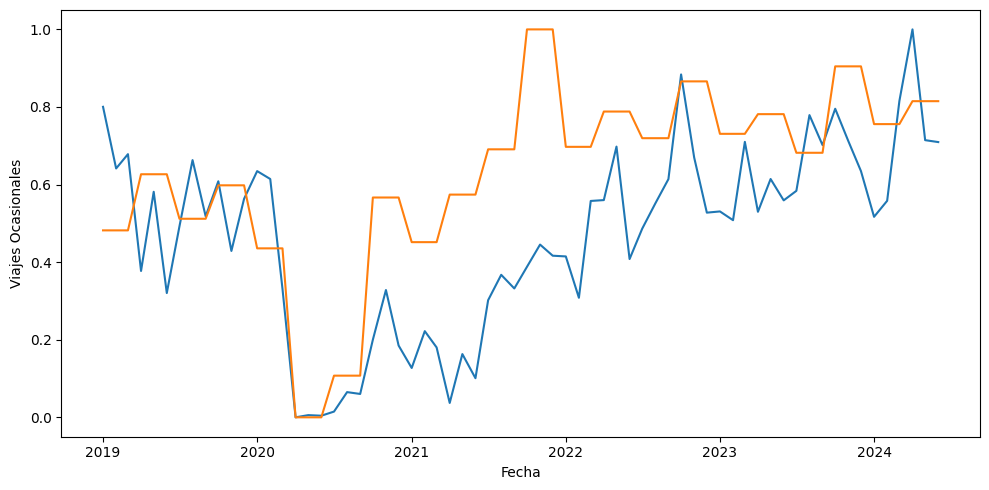

In [28]:
import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.preprocessing import MinMaxScaler

# Crear un scaler
scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar (reemplaza 'columna1' y 'columna2' con los nombres reales)
df_agrupado[['Viajes Ocasionales', 'PIB Region Destino']] = scaler.fit_transform(df_agrupado[['Viajes Ocasionales', 'PIB Region Destino']])


fig, axis = plt.subplots(figsize = (10, 5))
ts = df_agrupado['Viajes Ocasionales']
sns.lineplot(data = ts)
ts = df_agrupado['PIB Region Destino']
sns.lineplot(data = ts)


plt.tight_layout()

plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_agrupado['Viajes Ocasionales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.6631908036096936
p-value: 0.08062730698013165


In [29]:
import pmdarima as pm
import matplotlib.pyplot as plt

# Definir la serie temporal (asegúrate de tener la columna 'Viajes Ocasionales' y un índice de fecha)
series = df_agrupado['Viajes Ocasionales']

# Aplicar auto_arima para encontrar el mejor modelo SARIMA
model = pm.auto_arima(series,
                      seasonal=True,  # Estacionalidad (debe ser True para SARIMA)
                      m=12,  # Periodicidad estacional, 12 para datos mensuales
                      stepwise=True,  # Búsqueda paso a paso para eficiencia
                      trace=True,  # Para ver el progreso de la búsqueda de parámetros
                      suppress_warnings=True,  # Suprimir advertencias
                      max_order=10)  # Máximos órdenes para p, q, P, Q

# Ver el resumen del modelo seleccionado
print(model.summary())

# Hacer predicciones para los próximos 12 meses
forecast = model.predict(n_periods=12)

# Visualización de las predicciones
plt.figure(figsize=(10, 5))
plt.plot(series, label='Histórico')
plt.plot(range(len(series), len(series) + 12), forecast, label='Predicción', color='red')
plt.legend()
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Ajusta el modelo SARIMA
# (p, d, q) son los parámetros no estacionales, y (P, D, Q, S) los estacionales
model = SARIMAX(df_agrupado['Viajes Ocasionales'],
                order=(p, d, q),  # Parámetros no estacionales
                seasonal_order=(P, D, Q, S),  # Parámetros estacionales
                enforce_stationarity=False,  # No forzar estacionariedad
                enforce_invertibility=False)  # No forzar invertibilidad

model_fit = model.fit(disp=False)

# Ver el resumen del modelo
print(model_fit.summary())


NameError: name 'p' is not defined